In [98]:
import numpy as np
import pandas as pd
import re
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [175]:
%matplotlib inline

In [336]:
# load csv

df = pd.read_csv("./CandidateSummaryAction1.csv")

~~we want to remove anyone who got 0 votes - also want to look for more tightly contested races as our question~~ can't do this because the data set is missing votes for those who missed
since our question doesn't really pertain to unopposed or landslide campaigns

aggregate based on candidate_incumbent_challenger_open_seat as one
type of office cand_office for house/senate/pres
can also group spending by states cand_office_st
cand_office_dist might be interesting to see spending across a state

type of contributions - can compare individual_contribution
other_committee_contribution - contributions from pacs/other candidates
cand_contribution - from self
party_committee_contribution - from state/national party committees
total contribution
coverage_start_date - when a candidate started reporting finances note- dates are from 1/1/2015 - 10/19/2016
winner column represents if that candidate won - can be represented with boolean

is there a correlation between spending and cook partisan index(do this later)

In [13]:
df.columns

Index(['can_id', 'can_nam', 'can_off', 'can_off_sta', 'can_off_dis',
       'can_par_aff', 'can_inc_cha_ope_sea', 'can_str1', 'can_str2', 'can_cit',
       'can_sta', 'can_zip', 'ind_ite_con', 'ind_uni_con', 'ind_con',
       'par_com_con', 'oth_com_con', 'can_con', 'tot_con',
       'tra_fro_oth_aut_com', 'can_loa', 'oth_loa', 'tot_loa',
       'off_to_ope_exp', 'off_to_fun', 'off_to_leg_acc', 'oth_rec', 'tot_rec',
       'ope_exp', 'exe_leg_acc_dis', 'fun_dis', 'tra_to_oth_aut_com',
       'can_loa_rep', 'oth_loa_rep', 'tot_loa_rep', 'ind_ref', 'par_com_ref',
       'oth_com_ref', 'tot_con_ref', 'oth_dis', 'tot_dis',
       'cas_on_han_beg_of_per', 'cas_on_han_clo_of_per', 'net_con',
       'net_ope_exp', 'deb_owe_by_com', 'deb_owe_to_com', 'cov_sta_dat',
       'cov_end_dat', 'winner', 'votes'],
      dtype='object')

In [242]:
parsed_df = df[['can_nam', 'can_off', 'can_off_sta', 'can_off_dis', 'can_par_aff', 'can_inc_cha_ope_sea', 'ind_con', 'can_con', 'oth_com_con', 'tot_con', 'tot_dis', 'winner', 'votes']]

In [243]:
fill_values = {"can_con": 0.0, "ind_con": 0.0, "tot_con": 0.0, "oth_com_con": 0.0, "tot_dis": 0.0, "winner": "N" }
parsed_df = parsed_df.fillna(value=fill_values)
parsed_df

,can_nam,can_off,can_off_sta,can_off_dis,can_par_aff,can_inc_cha_ope_sea,ind_con,can_con,oth_com_con,tot_con,tot_dis,winner,votes
0,"ALLEN, RICHARD W",H,GA,12.0,REP,INCUMBENT,"$601,274.50",0.0,"$473,675.00","$1,074,949.50","$978,518.98",Y,158708.0
1,"EVANS, DWIGHT",H,PA,2.0,DEM,CHALLENGER,"$1,114,711.02",0.0,"$302,834.20","$1,417,545.22","$1,313,583.69",Y,310770.0
2,"RUTHERFORD, JOHN",H,FL,4.0,REP,OPEN,"$542,105.38","$2,700.00","$106,050.00","$650,855.38","$675,642.76",Y,286018.0
3,"ZINKE, RYAN K",H,MT,0.0,REP,INCUMBENT,"$4,317,331.58",0.0,"$660,038.51","$4,980,915.41","$5,200,630.00",Y,280476.0
4,"LEE, BARBARA",H,CA,13.0,DEM,INCUMBENT,"$897,123.61",0.0,"$308,740.00","$1,205,863.61","$1,112,163.94",Y,277390.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1809,"BUTTOCKS, SYDNEYS VOLUPTOUS",P,US,0.0,IND,OPEN,0.0,0.0,0.0,0.0,0.0,N,NaN
1810,"MOLNAR, ROBERT",S,CA,0.0,REP,OPEN,0.0,"$1,000.00",0.0,"$1,000.00","$2,000.00",N,NaN
1811,"HOLMES, GREGORY",S,MD,0.0,REP,OPEN,0.0,0.0,0.0,0.0,0.0,N,NaN
1812,"HUNKIN-FINAU, VAITINASA SALU",H,AS,NaN,DEM,NaN,"$20,555.00","$12,900.00",0.0,"$41,670.00","$38,167.44",N,NaN


In [154]:
parsed_df[parsed_df['winner'] != 'Y']

,can_nam,can_off,can_off_sta,can_off_dis,can_par_aff,can_inc_cha_ope_sea,ind_con,can_con,tot_con,winner,votes
382,"FOX, RANDY",H,CA,41.0,REP,CHALLENGER,"$64,065.00","$1,000.00","$67,065.00",N,NaN
383,"GRAHAM, JOHN COLLINS",S,CO,0.0,REP,CHALLENGER,"$462,280.00","$21,567.00","$483,847.00",N,NaN
384,"CARO, SUZANNE M",H,CA,13.0,REP,CHALLENGER,"$3,050.00","$1,471.00","$4,521.00",N,NaN
385,"EVANS, ROBERT S",H,CA,6.0,REP,CHALLENGER,"$2,805.00",0.0,"$2,805.00",N,NaN
386,"FISCHELLA, TYLER R",H,CA,35.0,REP,CHALLENGER,"$2,740.29",$762.36,"$3,502.65",N,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1809,"BUTTOCKS, SYDNEYS VOLUPTOUS",P,US,0.0,IND,OPEN,0.0,0.0,0.0,N,NaN
1810,"MOLNAR, ROBERT",S,CA,0.0,REP,OPEN,0.0,"$1,000.00","$1,000.00",N,NaN
1811,"HOLMES, GREGORY",S,MD,0.0,REP,OPEN,0.0,0.0,0.0,N,NaN
1812,"HUNKIN-FINAU, VAITINASA SALU",H,AS,NaN,DEM,NaN,"$20,555.00","$12,900.00","$41,670.00",N,NaN


In [101]:
re.sub('[^0-9\.]', '', parsed_df['ind_con'][0])

'601274.50'

In [244]:
parsed_df['ind_con'] = parsed_df.ind_con.map(lambda x: float(re.sub('[^0-9\.]', '', str(x))))

In [245]:
parsed_df['can_con'] = parsed_df.can_con.map(lambda x: float(re.sub('[^0-9\.]', '', str(x))))

In [246]:
parsed_df['tot_con'] = parsed_df.tot_con.map(lambda x: float(re.sub('[^0-9\.]', '', str(x))))

In [247]:
parsed_df['tot_dis'] = parsed_df.tot_dis.map(lambda x: float(re.sub('[^0-9\.]', '', str(x))))

In [248]:
parsed_df['oth_com_con'] = parsed_df.oth_com_con.map(lambda x: float(re.sub('[^0-9\.]', '', str(x))))

In [241]:
parsed_df[(parsed_df['can_off_sta'] == 'GA') & (parsed_df['can_off_dis'] == 12.0)]

,can_nam,can_off,can_off_sta,can_off_dis,can_par_aff,oth_com_con,can_inc_cha_ope_sea,ind_con,can_con,tot_con,tot_dis,winner,votes
0,"ALLEN, RICHARD W",H,GA,12.0,REP,473675.0,INCUMBENT,601274.50,0.0,1074949.50,978518.98,Y,158708.0
726,"MCCRACKEN, TRICIA CARPENTER",H,GA,12.0,DEM,0.0,CHALLENGER,0.00,6882.0,13764.64,10440.00,N,NaN
1080,"YU, EUGENE MR.",H,GA,12.0,REP,0.0,CHALLENGER,28007.87,0.0,28007.87,55423.31,N,NaN


In [266]:
parsed_df = parsed_df[parsed_df["tot_dis"] != 0.0]
parsed_df = parsed_df[parsed_df["tot_con"] != 0.0]
party_parse_array = ['REP', 'DEM', 'LIB', 'IND', 'GRE']
parsed_df = parsed_df[parsed_df["can_par_aff"].isin(party_parse_array)]

In [267]:
parsed_df['can_par_aff'].unique()

array(['REP', 'DEM', 'LIB', 'IND', 'GRE'], dtype=object)

In [296]:
# winners and losers
winner_df = parsed_df[parsed_df["winner"] == 'Y']
loser_df = parsed_df[parsed_df["winner"] == 'N']

In [316]:
winner_df
loser_df
winner_df["tot_con"].describe()

count    4.650000e+02
mean     2.221969e+06
std      5.762780e+06
min      2.415732e+05
25%      8.837652e+05
50%      1.263560e+06
75%      2.020066e+06
max      1.144922e+08
Name: tot_con, dtype: float64

In [ ]:
# create a plot of spending vs. victory

In [250]:
parsed_df.sort_values(by=['tot_dis'], ascending=False)

,can_nam,can_off,can_off_sta,can_off_dis,can_par_aff,can_inc_cha_ope_sea,ind_con,can_con,oth_com_con,tot_con,tot_dis,winner,votes
1359,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",P,US,0.0,DEM,OPEN,3.582784e+08,1350632.01,1686586.71,3.613296e+08,4.505656e+08,N,NaN
1319,"TRUMP, DONALD J. / MICHAEL R. PENCE",P,US,0.0,REP,OPEN,1.057999e+08,8599568.25,87905.50,1.144922e+08,2.389627e+08,Y,NaN
1425,"SANDERS, BERNARD",P,US,0.0,DEM,OPEN,2.318316e+08,0.00,5621.92,2.318372e+08,2.320313e+08,N,NaN
1473,"CRUZ, RAFAEL EDWARD TED""""",P,US,0.0,REP,OPEN,9.203612e+07,0.00,101095.14,9.213722e+07,9.337319e+07,N,NaN
1332,"CARSON, BENJAMIN S SR MD",P,US,0.0,REP,OPEN,6.346140e+07,0.00,5588.29,6.346699e+07,6.425823e+07,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,"CUMMINGS, DANIEL CLYDE",P,US,0.0,CST,OPEN,0.000000e+00,15.00,0.00,1.500000e+01,1.500000e+01,N,NaN
1202,"JACKSON, TROY",H,ME,1.0,DEM,CHALLENGER,2.684700e+02,0.00,0.00,2.684700e+02,1.500000e+01,N,NaN
1024,"ROGERS, EVELYN L (LOUISE)",H,OK,1.0,REP,CHALLENGER,0.000000e+00,1147.00,0.00,1.147000e+03,6.000000e+00,N,NaN
1591,"SMITH, WILLIAM ROGER",P,US,0.0,IND,OPEN,0.000000e+00,605.00,0.00,2.640000e+02,3.000000e+00,N,NaN


In [272]:
parsed_df = parsed_df[parsed_df["ind_con"]/parsed_df["tot_con"] < 1]


count    1.380000e+03
mean     1.840837e+06
std      1.556043e+07
min      3.000000e+00
25%      3.891921e+04
50%      3.341533e+05
75%      1.052783e+06
max      4.505656e+08
Name: tot_dis, dtype: float64

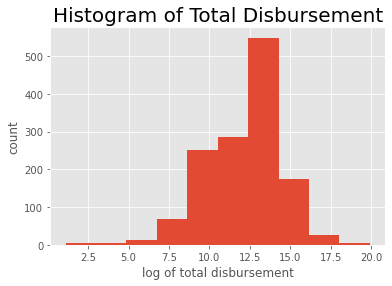

In [273]:
sorted_log_tot_dis = np.log(parsed_df["tot_dis"].sort_values(ascending=False))
# log of sorted total disbursement - how much was spent by the campaign
plt.hist(sorted_log_tot_dis)
plt.xlabel('log of total disbursement')
plt.ylabel('count')
plt.title("Histogram of Total Disbursement", fontsize = 20)
parsed_df["tot_dis"].describe()

In [ ]:
# proportion of contributions that are individual out of 
# total contributions (pacs), and associated party color

Text(0.5, 1.0, 'Proportion of contributions from individuals vs. log of Total Campaign Contributions')

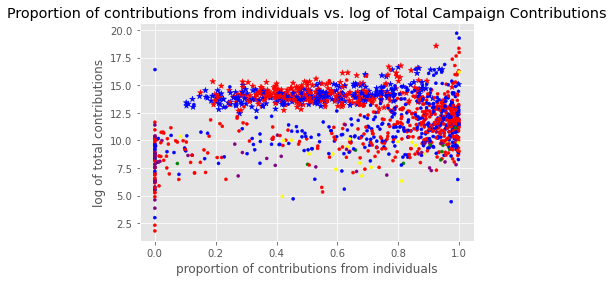

In [312]:
individual_con_percentage_win = winner_df["ind_con"]/winner_df["tot_con"]
total_con_log_win = np.log(winner_df["tot_con"])
party_winner = winner_df['can_par_aff']

individual_con_percentage_lose = loser_df["ind_con"]/loser_df["tot_con"]
total_con_log_lose = np.log(loser_df["tot_con"])
party_lose = loser_df['can_par_aff']

new_df_wins = pd.DataFrame(dict(party=party_winner, ind_con_percentage=individual_con_percentage_win, total_con_log=total_con_log_win))
new_df_lose = pd.DataFrame(dict(party=party_lose, ind_con_percentage=individual_con_percentage_lose, total_con_log=total_con_log_lose))


fig, ax = plt.subplots()
'REP', 'DEM', 'LIB', 'IND', 'GRE'
colors = {'REP': 'red', 'DEM': 'blue', 'IND': 'purple', 'LIB': 'yellow', 'GRE': 'green'}


ax.scatter(new_df_wins['ind_con_percentage'], new_df_wins['total_con_log'], c=new_df_wins['party'].map(colors), marker="*")
ax.scatter(new_df_lose['ind_con_percentage'], new_df_lose['total_con_log'], c=new_df_lose['party'].map(colors), marker=".")


plt.xlabel('proportion of contributions from individuals')
plt.ylabel('log of total contributions')
plt.title("Proportion of contributions from individuals vs. log of Total Campaign Contributions")


Text(0.5, 1.0, 'Losing proportion of contributions from individuals vs. log of total campaign contributions')

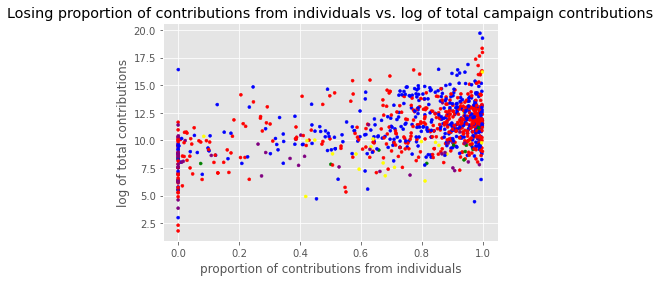

In [339]:
individual_con_percentage_lose = loser_df["ind_con"]/loser_df["tot_con"]
total_con_log_lose = np.log(loser_df["tot_con"])
party_lose = loser_df['can_par_aff']

new_df_lose = pd.DataFrame(dict(party=party_lose, ind_con_percentage=individual_con_percentage_lose, total_con_log=total_con_log_lose))

fig, ax = plt.subplots()
'REP', 'DEM', 'LIB', 'IND', 'GRE'
colors = {'REP': 'red', 'DEM': 'blue', 'IND': 'purple', 'LIB': 'yellow', 'GRE': 'green'}

ax.scatter(new_df_lose['ind_con_percentage'], new_df_lose['total_con_log'], c=new_df_lose['party'].map(colors), marker=".")


plt.xlabel('proportion of contributions from individuals')
plt.ylabel('log of total contributions')
plt.title("Losing proportion of contributions from individuals vs. log of total campaign contributions")

Text(0.5, 1.0, 'Winning proportion of contributions from individuals vs. log of total campaign contributions')

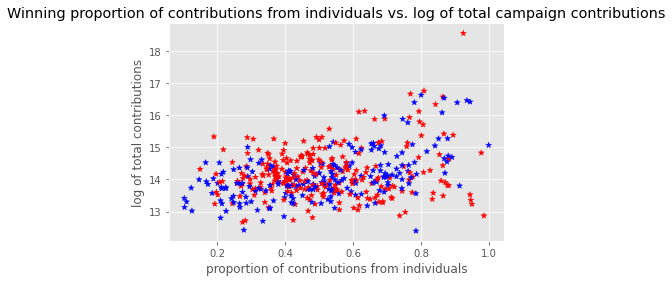

In [337]:
individual_con_percentage_win = winner_df["ind_con"]/winner_df["tot_con"]
total_con_log_win = np.log(winner_df["tot_con"])
party_winner = winner_df['can_par_aff']

individual_con_percentage_lose = loser_df["ind_con"]/loser_df["tot_con"]
total_con_log_lose = np.log(loser_df["tot_con"])
party_lose = loser_df['can_par_aff']

new_df_wins = pd.DataFrame(dict(party=party_winner, ind_con_percentage=individual_con_percentage_win, total_con_log=total_con_log_win))
new_df_lose = pd.DataFrame(dict(party=party_lose, ind_con_percentage=individual_con_percentage_lose, total_con_log=total_con_log_lose))


fig, ax = plt.subplots()
'REP', 'DEM', 'LIB', 'IND', 'GRE'
colors = {'REP': 'red', 'DEM': 'blue', 'IND': 'purple', 'LIB': 'yellow', 'GRE': 'green'}


ax.scatter(new_df_wins['ind_con_percentage'], new_df_wins['total_con_log'], c=new_df_wins['party'].map(colors), marker="*")
# ax.scatter(new_df_lose['ind_con_percentage'], new_df_lose['total_con_log'], c=new_df_lose['party'].map(colors), marker=".")


plt.xlabel('proportion of contributions from individuals')
plt.ylabel('log of total contributions')
plt.title("Winning proportion of contributions from individuals vs. log of total campaign contributions")

Text(0.5, 1.0, 'Losing proportion of contributions from individuals vs. log of total campaign contributions')

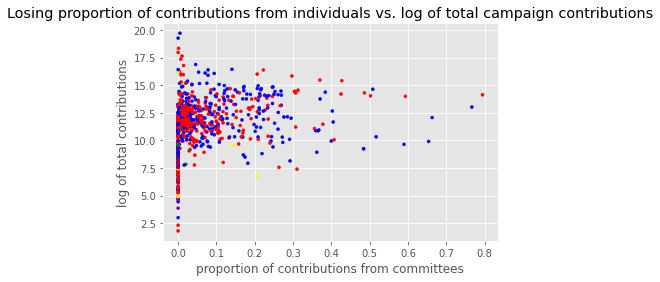

In [345]:
com_percentage_win = winner_df["oth_com_con"]/winner_df["tot_con"]
total_con_log_win = np.log(winner_df["tot_con"])
party_winner = winner_df['can_par_aff']

com_percentage_lose = loser_df["oth_com_con"]/loser_df["tot_con"]
total_con_log_lose = np.log(loser_df["tot_con"])
party_lose = loser_df['can_par_aff']

new_df_wins = pd.DataFrame(dict(party=party_winner, com_percentage=com_percentage_win, total_con_log=total_con_log_win))
new_df_lose = pd.DataFrame(dict(party=party_lose, com_percentage=com_percentage_lose, total_con_log=total_con_log_lose))


fig, ax = plt.subplots()
'REP', 'DEM', 'LIB', 'IND', 'GRE'
colors = {'REP': 'red', 'DEM': 'blue', 'IND': 'purple', 'LIB': 'yellow', 'GRE': 'green'}


# ax.scatter(new_df_wins['com_percentage'], new_df_wins['total_con_log'], c=new_df_wins['party'].map(colors), marker="*")
ax.scatter(new_df_lose['com_percentage'], new_df_lose['total_con_log'], c=new_df_lose['party'].map(colors), marker=".")


plt.xlabel('proportion of contributions from committees')
plt.ylabel('log of total contributions')
plt.title("Losing proportion of contributions from individuals vs. log of total campaign contributions")

Text(0.5, 1.0, 'Winning proportion of contributions from individuals vs. log of total campaign contributions')

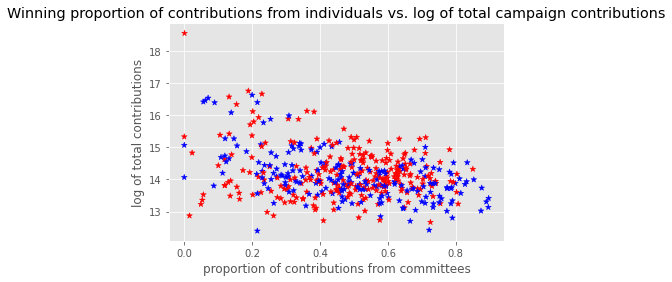

In [344]:
com_percentage_win = winner_df["oth_com_con"]/winner_df["tot_con"]
total_con_log_win = np.log(winner_df["tot_con"])
party_winner = winner_df['can_par_aff']

com_percentage_lose = loser_df["oth_com_con"]/loser_df["tot_con"]
total_con_log_lose = np.log(loser_df["tot_con"])
party_lose = loser_df['can_par_aff']

new_df_wins = pd.DataFrame(dict(party=party_winner, com_percentage=com_percentage_win, total_con_log=total_con_log_win))
new_df_lose = pd.DataFrame(dict(party=party_lose, com_percentage=com_percentage_lose, total_con_log=total_con_log_lose))


fig, ax = plt.subplots()
'REP', 'DEM', 'LIB', 'IND', 'GRE'
colors = {'REP': 'red', 'DEM': 'blue', 'IND': 'purple', 'LIB': 'yellow', 'GRE': 'green'}


ax.scatter(new_df_wins['com_percentage'], new_df_wins['total_con_log'], c=new_df_wins['party'].map(colors), marker="*")
# ax.scatter(new_df_lose['com_percentage'], new_df_lose['total_con_log'], c=new_df_lose['party'].map(colors), marker=".")


plt.xlabel('proportion of contributions from committees')
plt.ylabel('log of total contributions')
plt.title("Winning proportion of contributions from committees vs. log of total campaign contributions")

In [346]:
com_percentage_win.describe()

count    465.000000
mean       0.476770
std        0.198259
min        0.000000
25%        0.330654
50%        0.491711
75%        0.627310
max        0.896728
dtype: float64

In [317]:
np.exp(12)

162754.79141900392

Text(0.5, 1.0, 'Comparision of winning contributions and disbursement')

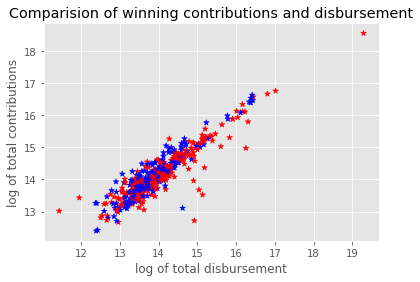

In [331]:
total_disbursement_win = np.log(winner_df["tot_dis"])
total_con_log_win = np.log(winner_df["tot_con"])
party_winner = winner_df['can_par_aff']

total_disbursement_lose = np.log(loser_df["tot_dis"])
total_con_log_lose = np.log(loser_df["tot_con"])
party_lose = loser_df['can_par_aff']

new_df_wins = pd.DataFrame(dict(party=party_winner, total_disbursement=total_disbursement_win, total_con_log=total_con_log_win))
new_df_lose = pd.DataFrame(dict(party=party_lose, total_disbursement=total_disbursement_lose, total_con_log=total_con_log_lose))


fig, ax = plt.subplots()
'REP', 'DEM', 'LIB', 'IND', 'GRE'
colors = {'REP': 'red', 'DEM': 'blue', 'IND': 'purple', 'LIB': 'yellow', 'GRE': 'green'}


ax.scatter(new_df_wins['total_disbursement'], new_df_wins['total_con_log'], c=new_df_wins['party'].map(colors), marker="*")
# ax.scatter(new_df_lose['total_disbursement'], new_df_lose['total_con_log'], c=new_df_lose['party'].map(colors), marker=".")


plt.xlabel('log of total disbursement')
plt.ylabel('log of total contributions')
plt.title('Comparision of winning contributions and disbursement')

Text(0.5, 1.0, 'Comparision of losing contributions and disbursement')

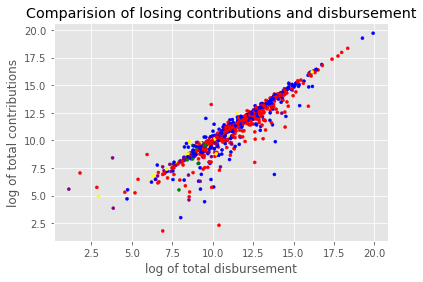

In [332]:
total_disbursement_win = np.log(winner_df["tot_dis"])
total_con_log_win = np.log(winner_df["tot_con"])
party_winner = winner_df['can_par_aff']

total_disbursement_lose = np.log(loser_df["tot_dis"])
total_con_log_lose = np.log(loser_df["tot_con"])
party_lose = loser_df['can_par_aff']

new_df_wins = pd.DataFrame(dict(party=party_winner, total_disbursement=total_disbursement_win, total_con_log=total_con_log_win))
new_df_lose = pd.DataFrame(dict(party=party_lose, total_disbursement=total_disbursement_lose, total_con_log=total_con_log_lose))


fig, ax = plt.subplots()
'REP', 'DEM', 'LIB', 'IND', 'GRE'
colors = {'REP': 'red', 'DEM': 'blue', 'IND': 'purple', 'LIB': 'yellow', 'GRE': 'green'}


# ax.scatter(new_df_wins['total_disbursement'], new_df_wins['total_con_log'], c=new_df_wins['party'].map(colors), marker="*")
ax.scatter(new_df_lose['total_disbursement'], new_df_lose['total_con_log'], c=new_df_lose['party'].map(colors), marker=".")


plt.xlabel('log of total disbursement')
plt.ylabel('log of total contributions')
plt.title('Comparision of losing contributions and disbursement')